## A study into success and popularity in the NBA

#### Calvin Muller

### Asking a question

When thinking about any sports team, the underlying assumption is that the better the team gets, the more popular the team will become. This makes sense logically: people like to talk about winners. However, could it also be true that if a team is bad on an extreme level that people will also want to talk about this? This is the question that I am investigating: how does the amount of wins a team has impact the popularity of that team? My hypothesis going into it that teams that are on the extreme of both wins and losses will be talked about more than teams that are just mediocre.


### Gathering the data

In order to find this data, I utilized trends.google.com, where Google tracks how much interest is in a certain topic over time. This data provides search data over the last five years for each of the NBA teams I wanted data on (Eastern Conference teams), which contains the first half of the data I need. The other half is the success of the teams, so I went ahead and manually inputted win data for each of these teams over this five year period. This will hopefully give me data that I can plot and find correlation between these two variables. All of this data was gathered into an Excel spreadsheet which I turned into a .CSV file.

In addition to the data that I gathered from these two sources, I created my own variable for extremity to add to this CSV, which I called "Extremity Score." This was simply the absolute value of the wins subtracted by 41 wins, which is the NBA average. I then created another subjective extremity score that used the value of 32 wins instead, thinking that is a better indicator of what a mediocre team looks like.

## Beginning to work with the data

#### Bringing in the data

Below I am bringing in the CSV data I gathered and putting it into first a normal pandas dataframe, and then putting it into a pandas pivot table, so that the data is easier to look at as it is grouped by teams. There is some data cleaning that happens here.

In [1]:
import numpy as np
import pandas as pd

In [2]:
fin_table = pd.read_csv('fin_table.csv')
fin_table.dropna(subset = ["Team"], inplace=True)
fin_table.head()

,Years,Searches,Wins,Team,Extremity Score,Extremity Score (32 wins)
1,2017.0,1237.0,51.0,Cavaliers,10.0,19.0
2,2018.0,1072.0,50.0,Cavaliers,9.0,18.0
3,2019.0,234.0,19.0,Cavaliers,22.0,13.0
4,2020.0,179.0,19.0,Cavaliers,22.0,13.0
5,2021.0,255.0,22.0,Cavaliers,19.0,10.0


In [3]:
pd_pivot = pd.pivot_table(fin_table, values = ['Searches', 'Wins'], index = ['Team', 'Searches', 'Wins', 'Extremity Score', 'Extremity Score (32 wins)'], columns = ['Years'], aggfunc=np.sum)
pd_pivot

Empty DataFrame
Columns: []
Index: [(Bucks, 169.0, 42.0, 1.0, 10.0), (Bucks, 218.0, 44.0, 3.0, 12.0), (Bucks, 272.0, 56.0, 15.0, 24.0), (Bucks, 478.0, 60.0, 19.0, 28.0), (Bucks, 701.0, 46.0, 5.0, 14.0), (Bulls, 1003.0, 22.0, 19.0, 10.0), (Bulls, 1144.0, 22.0, 19.0, 10.0), (Bulls, 1246.0, 27.0, 14.0, 5.0), (Bulls, 1432.0, 31.0, 10.0, 1.0), (Bulls, 1744.0, 41.0, 0.0, 9.0), (Cavaliers, 179.0, 19.0, 22.0, 13.0), (Cavaliers, 234.0, 19.0, 22.0, 13.0), (Cavaliers, 255.0, 22.0, 19.0, 10.0), (Cavaliers, 1072.0, 50.0, 9.0, 18.0), (Cavaliers, 1237.0, 51.0, 10.0, 19.0), (Celtics, 765.0, 48.0, 7.0, 16.0), (Celtics, 851.0, 36.0, 5.0, 4.0), (Celtics, 1136.0, 49.0, 8.0, 17.0), (Celtics, 1459.0, 55.0, 14.0, 23.0), (Celtics, 1601.0, 53.0, 12.0, 21.0), (Hawks, 239.0, 20.0, 21.0, 12.0), (Hawks, 334.0, 24.0, 17.0, 8.0), (Hawks, 368.0, 29.0, 12.0, 3.0), (Hawks, 377.0, 43.0, 2.0, 11.0), (Hawks, 696.0, 41.0, 0.0, 9.0), (Heat, 802.0, 41.0, 0.0, 9.0), (Heat, 851.0, 44.0, 3.0, 12.0), (Heat, 853.0, 40.0, 1.0, 8.0), (Heat, 934.0, 39.0, 2.0, 7.0), (Heat, 1076.0, 44.0, 3.0, 12.0), (Hornets, 1066.0, 23.0, 18.0, 9.0), (Hornets, 1218.0, 39.0, 2.0, 7.0), (Hornets, 1223.0, 36.0, 5.0, 4.0), (Hornets, 1271.0, 36.0, 5.0, 4.0), (Hornets, 1667.0, 33.0, 8.0, 1.0), (Knicks, 641.0, 21.0, 20.0, 11.0), (Knicks, 831.0, 29.0, 12.0, 3.0), (Knicks, 1015.0, 17.0, 24.0, 15.0), (Knicks, 1133.0, 31.0, 10.0, 1.0), (Knicks, 1355.0, 41.0, 0.0, 9.0), (Magic, 1058.0, 33.0, 8.0, 1.0), (Magic, 1189.0, 21.0, 20.0, 11.0), (Magic, 1625.0, 25.0, 16.0, 7.0), (Magic, 1666.0, 29.0, 12.0, 3.0), (Magic, 1870.0, 42.0, 1.0, 10.0), (Nets, 357.0, 28.0, 13.0, 4.0), (Nets, 439.0, 20.0, 21.0, 12.0), (Nets, 457.0, 35.0, 6.0, 3.0), (Nets, 732.0, 42.0, 1.0, 10.0), (Nets, 1276.0, 48.0, 7.0, 16.0), (Pacers, 622.0, 45.0, 4.0, 13.0), (Pacers, 746.0, 35.0, 6.0, 3.0), (Pacers, 904.0, 48.0, 7.0, 16.0), (Pacers, 955.0, 42.0, 1.0, 10.0), (Pacers, 1120.0, 48.0, 7.0, 16.0), (Pistons, 865.0, 20.0, 21.0, 12.0), (Pistons, 962.0, 37.0, 4.0, 5.0), (Pistons, 1078.0, 39.0, 2.0, 7.0), (Pistons, 1205.0, 20.0, 21.0, 12.0), (Pistons, 1278.0, 41.0, 0.0, 9.0), (Raptors, 71.0, 27.0, 14.0, 5.0), (Raptors, 95.0, 51.0, 10.0, 19.0), (Raptors, 101.0, 53.0, 12.0, 21.0), (Raptors, 168.0, 59.0, 18.0, 27.0), (Raptors, 484.0, 58.0, 17.0, 26.0), (Sixers, 644.0, 43.0, 2.0, 11.0), (Sixers, 675.0, 28.0, 13.0, 4.0), (Sixers, 1103.0, 52.0, 11.0, 20.0), (Sixers, 1237.0, 49.0, 8.0, 17.0), (Sixers, 1253.0, 51.0, 10.0, 19.0), (Wizards, 583.0, 25.0, 16.0, 7.0), (Wizards, 905.0, 32.0, 9.0, 0.0), (Wizards, 1106.0, 43.0, 2.0, 11.0), (Wizards, 1204.0, 34.0, 7.0, 2.0), (Wizards, 1447.0, 49.0, 8.0, 17.0)]

[75 rows x 0 columns]

#### Team dataframes
I continue to shape the data for future analysis by creating separate dataframes for each team.

In [4]:
teams_list = list(fin_table.groupby("Team"))

bucks_df = pd.DataFrame(teams_list[0][1])
bulls_df = pd.DataFrame(teams_list[1][1])
cavs_df = pd.DataFrame(teams_list[2][1])
celtics_df = pd.DataFrame(teams_list[3][1])
hawks_df = pd.DataFrame(teams_list[4][1])
heat_df = pd.DataFrame(teams_list[5][1])
hornets_df = pd.DataFrame(teams_list[6][1])
knicks_df = pd.DataFrame(teams_list[7][1])
magic_df = pd.DataFrame(teams_list[8][1])
nets_df = pd.DataFrame(teams_list[9][1])
pacers_df = pd.DataFrame(teams_list[10][1])
pistons_df = pd.DataFrame(teams_list[11][1])
raptors_df = pd.DataFrame(teams_list[12][1])
sixers_df = pd.DataFrame(teams_list[13][1])
wizards_df = pd.DataFrame(teams_list[14][1])

## Analysis Plan

To start analyzing this data to answer my question, I first want to visualize the data, specifically comparing wins to searches in scatter plots to see if there is any discernible patterns. I would then like to also plot extremity score to searches to start to look at whether or not higher extremity score, regardless of direction looks like it may have correlation with searches.

After creating these visuals, I would like to start actual statistical analysis to look at the correlations between these different variables to determine whether or not there is this correlation between worse teams on an extreme level and an increase in popularity.

In [5]:
from matplotlib import pyplot as plt

Below I am bringing in the matplotlib package to give me tools to visualize the data. The first visualization I am making is a scatter-plot comparing a team's wins to how much a team is searched. The second visualization is a scatter plot comparing a team's extremity score and how much a team is searched.

When looking at the first plot that deals with just wins, there does seem to be a little bit of shape to the data that shows a positive correlation so we will want to investigate that with a Pearson correlation test. Unfortunately, there doesn't seem to be too strong of an immediate correlation that can be seen from looking at the extremity score plot. We will have to do further analysis to determine if there is something here. It is also possible we will need to split this analysis up into a team-by-team analysis, so that we could take out any exterior variables that may change from team to team.

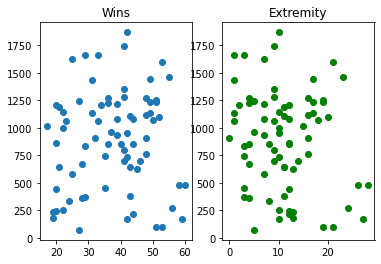

In [20]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].scatter(fin_table['Wins'], fin_table['Searches'])
ax1[0].set_title('Wins')
ax1[1].scatter(fin_table['Extremity Score (32 wins)'], fin_table['Searches'], color = 'g')
ax1[1].set_title('Extremity')
plt.show()


In [7]:
import scipy
from scipy import stats

In [8]:
scipy.stats.pearsonr(fin_table['Wins'], fin_table['Searches'])

(0.061000743609234215, 0.6031377948065617)

In [9]:
scipy.stats.pearsonr(fin_table['Extremity Score (32 wins)'], fin_table['Searches'])

(-0.17668327192330044, 0.1294234879803889)

Because the results of this correlation analysis between wins and searches show a high p-value, it leads me to believe that there are other explanatory variables that aren't included in the data I have. This high p-value says that there is a relatively high probability that randomly distributed data would have this same level of correlation. To attempt to correct for this, I will try to create plots for each team and then take a look at the results.

The p-value of the correlation between searches and the extremity score, while significantly lower, is still too high to pull any conclusions from.

### Individual Team Scatterplots

Below I have plotted each team on a scatter plot with wins on the x-axis and searches on the y-axis, as well as I plotted each team on a scatter plot with the extremity score on the x-axis and searches on the y-axis.

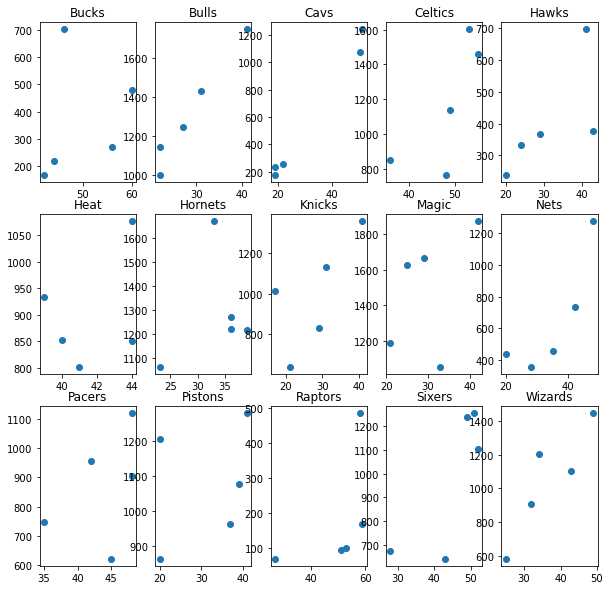

In [22]:
fig2, ax2 = plt.subplots(3, 5, figsize = (10, 10))
ax2[0][0].scatter(bucks_df['Wins'], bucks_df['Searches'])
ax2[0][0].set_title('Bucks')
ax2[0][1].scatter(bulls_df['Wins'], bulls_df['Searches'])
ax2[0][1].set_title('Bulls')
ax2[0][2].scatter(cavs_df['Wins'], cavs_df['Searches'])
ax2[0][2].set_title('Cavs')
ax2[0][3].scatter(celtics_df['Wins'], celtics_df['Searches'])
ax2[0][3].set_title('Celtics')
ax2[0][4].scatter(hawks_df['Wins'], hawks_df['Searches'])
ax2[0][4].set_title('Hawks')
ax2[1][0].scatter(heat_df['Wins'], heat_df['Searches'])
ax2[1][0].set_title('Heat')
ax2[1][1].scatter(hornets_df['Wins'], hornets_df['Searches'])
ax2[1][1].set_title('Hornets')
ax2[1][2].scatter(knicks_df['Wins'], knicks_df['Searches'])
ax2[1][2].set_title('Knicks')
ax2[1][3].scatter(magic_df['Wins'], magic_df['Searches'])
ax2[1][3].set_title('Magic')
ax2[1][4].scatter(nets_df['Wins'], nets_df['Searches'])
ax2[1][4].set_title('Nets')
ax2[2][0].scatter(pacers_df['Wins'], pacers_df['Searches'])
ax2[2][0].set_title('Pacers')
ax2[2][1].scatter(pistons_df['Wins'], pistons_df['Searches'])
ax2[2][1].set_title('Pistons')
ax2[2][2].scatter(raptors_df['Wins'], raptors_df['Searches'])
ax2[2][2].set_title('Raptors')
ax2[2][3].scatter(sixers_df['Wins'], sixers_df['Searches'])
ax2[2][3].set_title('Sixers')
ax2[2][4].scatter(wizards_df['Wins'], wizards_df['Searches'])
ax2[2][4].set_title('Wizards')

plt.show()

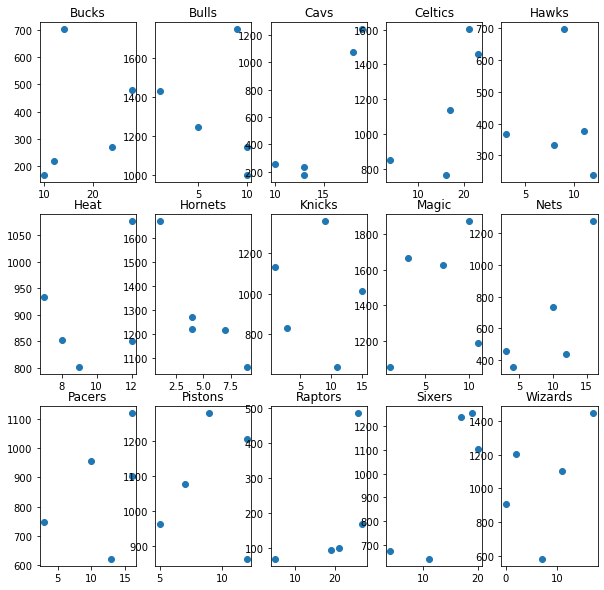

In [23]:
fig3, ax3 = plt.subplots(3, 5, figsize = (10, 10))
ax3[0][0].scatter(bucks_df['Extremity Score (32 wins)'], bucks_df['Searches'])
ax3[0][0].set_title('Bucks')
ax3[0][1].scatter(bulls_df['Extremity Score (32 wins)'], bulls_df['Searches'])
ax3[0][1].set_title('Bulls')
ax3[0][2].scatter(cavs_df['Extremity Score (32 wins)'], cavs_df['Searches'])
ax3[0][2].set_title('Cavs')
ax3[0][3].scatter(celtics_df['Extremity Score (32 wins)'], celtics_df['Searches'])
ax3[0][3].set_title('Celtics')
ax3[0][4].scatter(hawks_df['Extremity Score (32 wins)'], hawks_df['Searches'])
ax3[0][4].set_title('Hawks')
ax3[1][0].scatter(heat_df['Extremity Score (32 wins)'], heat_df['Searches'])
ax3[1][0].set_title('Heat')
ax3[1][1].scatter(hornets_df['Extremity Score (32 wins)'], hornets_df['Searches'])
ax3[1][1].set_title('Hornets')
ax3[1][2].scatter(knicks_df['Extremity Score (32 wins)'], knicks_df['Searches'])
ax3[1][2].set_title('Knicks')
ax3[1][3].scatter(magic_df['Extremity Score (32 wins)'], magic_df['Searches'])
ax3[1][3].set_title('Magic')
ax3[1][4].scatter(nets_df['Extremity Score (32 wins)'], nets_df['Searches'])
ax3[1][4].set_title('Nets')
ax3[2][0].scatter(pacers_df['Extremity Score (32 wins)'], pacers_df['Searches'])
ax3[2][0].set_title('Pacers')
ax3[2][1].scatter(pistons_df['Extremity Score (32 wins)'], pistons_df['Searches'])
ax3[2][1].set_title('Pistons')
ax3[2][2].scatter(raptors_df['Extremity Score (32 wins)'], raptors_df['Searches'])
ax3[2][2].set_title('Raptors')
ax3[2][3].scatter(sixers_df['Extremity Score (32 wins)'], sixers_df['Searches'])
ax3[2][3].set_title('Sixers')
ax3[2][4].scatter(wizards_df['Extremity Score (32 wins)'], wizards_df['Searches'])
ax3[2][4].set_title('Wizards')

plt.show()

### Conclusions from visualizations

Upon looking at the various plots for each team, there are a few interpretations one could make. Looking at the charts that are plotting wins as the independent variable it seems that there is a visible positive correlation between wins and searches. However, when looking at the charts plotting the extremity variable, it is not clear that there is this same positive correlation that I initially thought there might be.

Because the sample size is only 5 for each team, running a correlation test will not necessarily be valuable in providing accurate correlation. When you run it for some teams, it shows a very high correlation with low p-values, however for other teams it shows the opposite. As a result of this, the conclusions that we draw are going to have to come from just visualizing the data all together. Luckily the human brain is pretty good at picking out patterns, so we can have some degree of confidence in our conclusions.

As it seems, the underlying assumption that wins positively correlate with popularity, or searches, can be affirmed. We see that with few exceptions, the team's searches go up as there win total rises. However, we do not see any sort of apparent correlation in these scatter plots of the extremity scores.

## Final Conclusions

After gathering this data and making an attempt to visualize and analyze it, there are a few takeaways that we can have, even if they aren't as conclusive as I had first hoped. Firstly, with some degree of confidence, the data that I have gathered confirms the idea that there is a positive correlation between a team's success and how much they are searched. Secondly, there doesn't seem to be the correlation that I initially expected between a team's extremity score and how much they are searched. While this doesn't support my initial hypothesis, it does provide what seems to be the interesting answer: people just don't care about losing teams, even though there might be more interesting events surrounding them relative to mediocre teams.

There are some limitations in this data that if I could overcome, might provide better future analysis. The first of these is that the data that Google provided on these searches only goes back five years (it goes back 20, but there is a noticeable up-tick in all Google searches around 2013, so including those other 12 years of data would likely provide incorrect conclusions). If there was some all inclusive, perfect popularity metric for NBA teams, this would provide larger sample sizes for analysis and higher quality analysis that doesn't leave out other explained variables.

If I were to continue research into this topic, I would try to continue to look into what factors lead towards rise in a team's popularity. I would want to find specific events that can happen to NBA teams, like playoff victories, championships, All-Star players, city population, and draft position to see what impact each of these would have on the popularity. I would likely want to run some sort of regression on this data, so it could provide values for each of these variables. This could lead to very interesting conclusions that there are perhaps overlooked events that lead to a team being more popular.